In [ ]:
import numpy as np

In [5]:
import json
from covid19model.optimization.utils import samples_dict_to_emcee_chain # used for corner plots

json_loc = '../../data/interim/model_parameters/COVID19_SEIRD/calibrations/national'
json_name = 'initial_states_2020-09-01.json'

# Load dict and thin/discard
states_dict = json.load(open(f'{json_loc}/{json_name}'))
# nwalkers=samples_dict[f'n_chains_FULL']
# discard=0
# thin=50
# samples,flat_samples = samples_dict_to_emcee_chain(samples_dict, parNames_mcmc, nwalkers, discard=discard, thin=thin)
states_dict['E']

9

In [10]:
from covid19model.models.utils import initial_state

initial_state(dist='frac', agg='mun', number=3, age=-1)

array([[1.11605717e-04, 1.26126907e-04, 1.18990779e-04, ...,
        1.58405437e-04, 1.38822575e-04, 8.59654442e-05],
       [1.79157881e-02, 1.53091966e-02, 1.89179920e-02, ...,
        1.26108969e-02, 9.04516888e-03, 7.18465688e-03],
       [1.12443268e-04, 1.40912185e-04, 1.35988315e-04, ...,
        1.56668566e-04, 1.04654602e-04, 8.37057768e-05],
       ...,
       [3.60270011e-04, 4.15696167e-04, 3.75492688e-04, ...,
        4.76586873e-04, 3.14601982e-04, 2.10775521e-04],
       [1.19341981e-04, 1.43730670e-04, 1.36121399e-04, ...,
        1.58103737e-04, 1.02107308e-04, 5.40453333e-05],
       [1.08559860e-04, 1.21493750e-04, 1.44393095e-04, ...,
        1.71957122e-04, 1.22129843e-04, 7.29386560e-05]])

In [94]:
import datetime

initial_time = datetime.datetime(2021, 6, 14, 0, 0, 0)
intermediate_time = datetime.datetime.now()

runtime = intermediate_time - initial_time
totalMinute, second = divmod(runtime.seconds, 60)
hour, minute = divmod(totalMinute, 60)
runtime.days

# runtime = (intermediate_time - initial_time)
# totalMinute, second = divmod(runtime.seconds, 60)
# hour, minute = divmod(totalMinute, 60)
# print(f"Run time PSO: {hour}h{minute:02}m{second:02}s")

11

In [1]:
from covid19model.data.model_parameters import get_COVID19_SEIRD_parameters

params = get_COVID19_SEIRD_parameters(spatial=None)

params.keys()

dict_keys(['Nc', 'h', 'c', 'm_C', 'm_ICU', 'dc_R', 'dc_D', 'dICU_R', 'dICU_D', 'dICUrec', 'a', 's', 'da', 'dm', 'dhospital', 'sigma', 'omega', 'zeta', 'beta', 'alpha', 'K_inf1', 'K_inf2', 'K_hosp'])

In [6]:
params['s']

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [135]:
import numpy as np
sum(np.array([1305219, 1298970,1395385,1498535,1524152,1601891,1347696,908725,658753])*params['dICU_D'])/11539326

12.569820585708385

In [142]:
params['Nc']

array([[ 7.70501356,  1.22596453,  1.03380337,  2.39695359,  1.3644924 ,
         1.05753481,  0.58895731,  0.23580222,  0.11883674],
       [ 1.20142591, 10.37362046,  2.44065057,  2.32222936,  2.83390018,
         0.9293163 ,  0.37101187,  0.30359433,  0.08273862],
       [ 0.93217498,  2.24567041,  6.06208243,  3.56617275,  3.5130545 ,
         2.95018367,  0.65363268,  0.30727808,  0.37229272],
       [ 2.03131528,  2.00818506,  3.35166488,  5.52533572,  4.90135922,
         3.21770998,  1.34628637,  0.55425187,  0.32999622],
       [ 1.03330221,  2.18988695,  2.95040493,  4.37980786,  5.5590411 ,
         3.3626401 ,  1.479064  ,  0.99669675,  0.33434559],
       [ 0.88581138,  0.79431186,  2.74053997,  3.18035626,  3.71938158,
         3.82337919,  1.43651785,  0.62789418,  0.4146591 ],
       [ 0.64878605,  0.41704834,  0.79853129,  1.74999747,  2.15153499,
         1.88921822,  1.96345279,  0.91675176,  0.37831674],
       [ 0.33820334,  0.4443289 ,  0.48876723,  0.93803589,  1

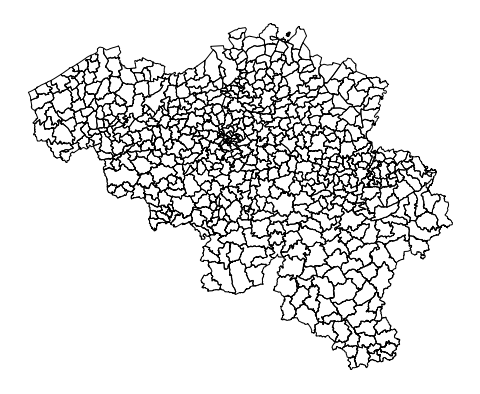

In [9]:
# Data analysis package, numerical package, plotting package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use datetime format in indices
import datetime

import geopandas as gp
from mpl_toolkits.axes_grid1 import make_axes_locatable # for plot aesthetics

# Import nice colors for plotting
from matplotlib import colors

# Import operation system module to create directories
import os


# Load different geographical aggregations
country = gp.read_file("../../data/raw/GIS/shapefiles/BE/AD_6_Country.shp")
regions = gp.read_file("../../data/raw/GIS/shapefiles/BE/AD_5_Region.shp")
provinces = gp.read_file("../../data/raw/GIS/shapefiles/BE/AD_4_Province.shp")
arrondissements = gp.read_file("../../data/raw/GIS/shapefiles/BE/AD_3_District.shp")
municipalities = gp.read_file("../../data/raw/GIS/shapefiles/BE/AD_2_Municipality.shp")
postalcodes  = gp.read_file("../../data/raw/GIS/shapefiles/BE/code-postaux-belge.shp")

# Show different geographical aggregations on the same axes
ax = municipalities.plot(figsize = (12,7), color='none', edgecolor = 'black')
postalcodes.plot(color='none', edgecolor='red', ax=ax)
# arrondissements.plot(color='none', edgecolor = 'lightgrey', ax=ax)
# provinces.plot(color='none', edgecolor = 'chocolate', ax=ax)
# regions.plot(color='none', edgecolor = 'darkred', ax=ax)
# country.plot(color='none', edgecolor = 'k', ax=ax)
ax.set_axis_off()

# Add NIS-code to Arrondissement Brussel-Hoofdstad
provinces.loc[provinces['NISCode']=='NA', 'NISCode'] = '21000'

# Add Dutch names
provinces.loc[provinces['NISCode'] == 'NA', 'NameDut'] = 'Brussel'
provinces.loc[provinces['NISCode'] == '20002', 'NameDut'] = 'Waals-Brabant'
provinces.loc[provinces['NISCode'] == '60000', 'NameDut'] = 'Luik'
provinces.loc[provinces['NISCode'] == '80000', 'NameDut'] = 'Luxemburg'
provinces.loc[provinces['NISCode'] == '90000', 'NameDut'] = 'Namen'

# fig = ax.get_figure()
# fig.savefig('test', bbox_inches='tight')

In [1]:
from covid19model.data import sciensano

In [2]:
df_hosp, df_mort, df_cases, df_vacc = sciensano.get_sciensano_COVID19_data(update=False)

In [3]:
df=sciensano.get_sciensano_COVID19_data_spatial(agg='prov', values='hospitalised_IN', public=True, moving_avg=True)
df

NIS_prov,10000,20001,20002,21000,30000,40000,50000,60000,70000,80000,90000
DATE,,,,,,,,,,,
2020-03-18,29.714286,10.428571,3.428571,22.000000,18.714286,23.857143,30.142857,16.142857,20.857143,5.428571,3.714286
2020-03-19,36.000000,13.000000,4.142857,26.857143,21.714286,26.000000,31.714286,20.571429,23.714286,6.142857,4.285714
2020-03-20,42.714286,15.714286,4.142857,28.285714,24.571429,28.571429,34.000000,23.571429,26.142857,6.714286,5.428571
2020-03-21,53.000000,17.714286,4.857143,33.428571,29.857143,34.428571,35.571429,26.857143,31.714286,7.571429,7.000000
2020-03-22,63.285714,21.428571,5.428571,40.714286,38.142857,38.571429,38.571429,32.571429,37.714286,8.571429,9.000000
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-18,12.571429,3.857143,1.714286,16.285714,12.000000,9.142857,11.142857,15.571429,5.714286,3.000000,2.142857
2021-10-19,14.285714,4.571429,2.000000,17.142857,13.857143,9.428571,14.142857,15.571429,6.142857,3.000000,2.285714
2021-10-20,14.142857,4.142857,2.428571,18.000000,15.000000,10.142857,14.428571,13.714286,6.285714,3.714286,2.428571


In [12]:
from covid19model.visualization.utils import moving_avg

for NIS in df.columns:
    df[[NIS]] = moving_avg(df[[NIS]])
    
df.dropna(inplace=True) # remove first and last 3 days (NA due to averaging)
df

NIS_prov,10000,20001,20002,21000,30000,40000,50000,60000,70000,80000,90000
DATE,,,,,,,,,,,
2020-03-18,29.714286,10.428571,3.428571,22.000000,18.714286,23.857143,30.142857,16.142857,20.857143,5.428571,3.714286
2020-03-19,36.000000,13.000000,4.142857,26.857143,21.714286,26.000000,31.714286,20.571429,23.714286,6.142857,4.285714
2020-03-20,42.714286,15.714286,4.142857,28.285714,24.571429,28.571429,34.000000,23.571429,26.142857,6.714286,5.428571
2020-03-21,53.000000,17.714286,4.857143,33.428571,29.857143,34.428571,35.571429,26.857143,31.714286,7.571429,7.000000
2020-03-22,63.285714,21.428571,5.428571,40.714286,38.142857,38.571429,38.571429,32.571429,37.714286,8.571429,9.000000
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-18,12.571429,3.857143,1.714286,16.285714,12.000000,9.142857,11.142857,15.571429,5.714286,3.000000,2.142857
2021-10-19,14.285714,4.571429,2.000000,17.142857,13.857143,9.428571,14.142857,15.571429,6.142857,3.000000,2.285714
2021-10-20,14.142857,4.142857,2.428571,18.000000,15.000000,10.142857,14.428571,13.714286,6.285714,3.714286,2.428571


<AxesSubplot:xlabel='DATE'>

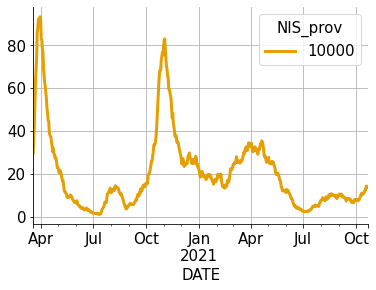

In [13]:
df[[10000]].plot()